<a href="https://colab.research.google.com/github/gideononyewuenyi/Time-Series-Forecasting/blob/main/Time_Series_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement

Air pollution has been a major problem faced in Nigeria especially in the southern part of the country that’s plagued with soot resulting from illegal refining of crude oil, flaring of gases, and uncontrolled emission from automobiles. (https://qz.com/africa/912374/nigerian-city-of-port-harcourt-is-dealing-with-with-a-mystery-soot-air-pollution-panic/)
(https://twitter.com/FMEnvng/status/831561428414763009)


## What is our goal?

Our goal is to be able to predict the amount of air pollution (PM 2.5) over a period of time 
* (To determine air quality in an area, pollutant concentrations are physically measured and reported. The AQI is calculated based on the average concentration of a particular pollutant measured over a standard time interval (24 hours for most pollutants, 8 hours for carbon monoxide and ozone), you can learn more here:
https://fit.thequint.com/health-news/explaining-air-quality-index#read-more  
https://cpcb.nic.in/displaypdf.php?id=bmF0aW9uYWwtYWlyLXF1YWxpdHktaW5kZXgvQWJvdXRfQVFJLnBkZg== )


## Import some relevant packages

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from IPython.display import display, HTML, display_html
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_palette('bright')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# set formatting
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Read in my data

In this notebook, we will be using a dataset of air quality obtained from the Purpleair sensor in Lagos that took readings every 30min from 12/2019 until it stopped reporting back in 6/2021

In [329]:
url = "https://raw.githubusercontent.com/gideononyewuenyi/Exploratory-analysis/main/Lekki%20Phase%201%20(outside)%20(6.451397%203.471201)%20Primary%2030_minute_average%2012_17_2019%206_6_2021.csv"
df = pd.read_csv (url)

## Take a look at my data
- How many rows and columns are in the dataset?
- What data types are the columns?
- Is the data complete? Are there nulls? 


In [330]:
# look at data
display(df.head())

# look a shape of data
display(df.shape)

# look at data types. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].dtypes)

# see if any columns have nulls. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].isnull().any())

# display descriptive statistics
display(df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

,created_at,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 9
0,2019-12-17 20:00:00 UTC,1.99,3.05,3.27,3.25,-53.75,72.50,16.50,3.05,NaN
1,2019-12-17 20:30:00 UTC,1.89,2.80,3.09,11.19,-53.69,73.88,15.12,2.80,NaN
2,2019-12-17 21:00:00 UTC,34.62,93.43,141.47,38.00,-53.87,74.07,15.40,63.67,NaN
3,2019-12-17 21:30:00 UTC,0.89,2.59,3.58,68.00,-55.47,76.53,15.00,2.59,NaN
4,2019-12-17 22:00:00 UTC,0.00,0.00,0.01,98.00,-54.60,77.00,14.87,0.00,NaN


(37595, 10)

created_at           object
PM1.0_CF1_ug/m3     float64
PM2.5_CF1_ug/m3     float64
PM10.0_CF1_ug/m3    float64
UptimeMinutes       float64
dtype: object

created_at          False
PM1.0_CF1_ug/m3     False
PM2.5_CF1_ug/m3     False
PM10.0_CF1_ug/m3    False
UptimeMinutes       False
dtype: bool

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,Unnamed: 9
count,37538.000000,37538.000000,37538.000000,37538.000000,37538.000000,37538.000000,37538.000000,37538.000000,0.0
mean,6.007100,8.584424,9.092260,22233.899164,-66.844293,78.717398,31.854816,7.991469,NaN
std,10.415071,16.605593,18.286916,18422.876237,8.783105,6.350175,12.522367,12.175910,NaN
min,0.000000,0.000000,0.000000,2.000000,-87.000000,52.200000,10.000000,0.000000,NaN
25%,1.470000,2.120000,2.280000,6348.000000,-74.200000,73.930000,22.000000,2.120000,NaN
50%,3.470000,4.750000,5.030000,18293.000000,-69.930000,79.000000,30.000000,4.750000,NaN
75%,6.990000,9.580000,10.037500,34524.000000,-58.330000,83.000000,40.530000,9.570000,NaN
85%,9.860000,13.810000,14.480000,44419.000000,-57.400000,85.800000,46.670000,13.780000,NaN
95%,19.864500,28.023000,29.471500,58248.000000,-55.800000,89.000000,54.279000,27.500000,NaN
99%,41.780000,62.187100,65.110000,67808.750000,-54.600000,94.695200,62.244100,45.968900,NaN


## Processing my data

In [331]:
# Rename columns
df = df.rename(columns = {'created_at': 'dt', 'PM2.5_ATM_ug/m3': 'pm'})


# Change index to datetime
df['dt'].index = pd.to_datetime(df.index)

# Sort the values
df = df.sort_index(ascending = True)

# Fill values with forward fill
df = df.fillna(method='ffill')

# Show the end of the data
display(df.tail())

,dt,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,pm,Unnamed: 9
37590,2021-06-06 06:00:00 UTC,40.47,56.64,59.53,798.0,-77.33,86.00,64.00,44.06,NaN
37591,2021-06-06 06:30:00 UTC,40.47,56.64,59.53,798.0,-77.33,86.00,64.00,44.06,NaN
37592,2021-06-06 07:00:00 UTC,26.22,37.35,39.07,962.0,-82.31,88.38,62.62,34.06,NaN
37593,2021-06-06 07:30:00 UTC,23.22,33.16,34.51,990.0,-75.20,89.73,57.33,31.54,NaN
37594,2021-06-06 08:00:00 UTC,23.23,32.86,33.53,1008.0,-75.67,91.00,55.33,31.37,NaN


## Plot my data
- Is there an overall increasing trend?
- Are there some differences in the variance over time? 
- There may be some seasonality (i.e., cycles) in the data.

Text(0, 0.5, 'PM2.5')

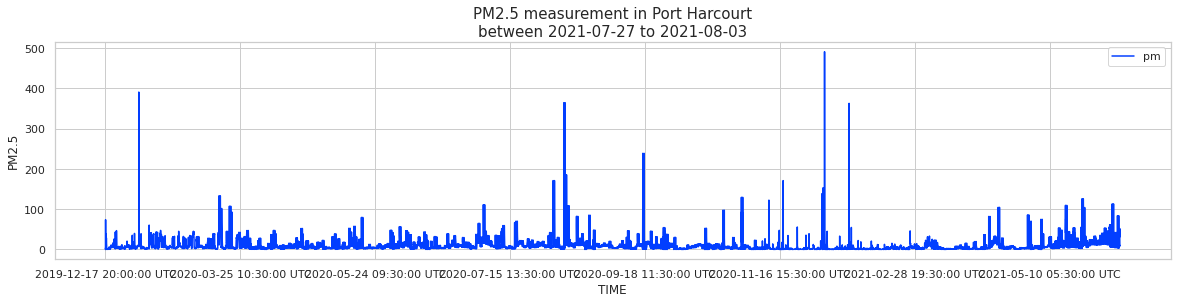

In [332]:
df.plot(x="dt", y= 'pm', figsize=(20,4))
plt.title("PM2.5 measurement in Port Harcourt\nbetween 2021-07-27 to 2021-08-03", size=15)
plt.xlabel('TIME', size=12)
plt.ylabel('PM2.5', size=12)

## Look at stationarity
Some time-series models, such as ARIMA, assume that the underlying data is stationary but before applying any statistical model on a Time Series, the series has to be staionary, which means that, over different time periods,
*  It should have constant mean.
*  It should have constant variance or standard deviation.
*  Auto-covariance (used to estimate. the dominant periods in the time series) should not depend on time.

If a time series has a specific (stationary) behavior over a given time interval, then it can be assumed that the time series will behave the same at a later time.

Time series with trend and/or seasonality are not stationary. Trend indicates that the mean is not constant over time and seasonality indicates that the variance is not constant over time.

### The check for stationarity can be done via these three different approaches:

* visually: plot time series and check for trends or seasonality
* basic statistics: split time series and compare the mean and variance of each partition
* statistical test: Augmented Dickey Fuller test (which we will explore)

Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).

Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).

If the null hypothesis can be rejected, we can conclude that the time series is stationary.

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

**p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
**p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

**ADF statistic > critical value**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
**ADF statistic < critical value**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [333]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df, pm):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = df[pm].rolling(window = 12, center = False).mean()
    rolstd = df[pm].rolling(window = 12, center = False).std()

    # Plot rolling statistics:
    orig = plt.plot(df[pm], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(pm))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[pm], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

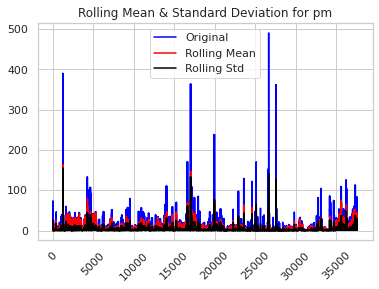

Results of Dickey-Fuller Test:
Test Statistic                -1.101329e+01
p-value                        6.246760e-20
# Lags Used                    5.300000e+01
Number of Observations Used    3.754100e+04
Critical Value (1%)           -3.430524e+00
Critical Value (5%)           -2.861617e+00
Critical Value (10%)          -2.566811e+00
dtype: float64


In [334]:
test_stationarity(df = df, pm = 'pm')

## Correct for stationarity

It is common for time series data to have to correct for non-stationarity. 

The two common reasons behind non-stationarity are:

1. **Trend** – mean is not constant over time.
2. **Seasonality** – variance is not constant over time.


**What happens if you do not correct for these things?**

Many things can happen, including:
- Variance can be mis-specified
- Model fit can be worse.  
- Not leveraging valuable time-dependent nature of the data.  
 


## Ways to correct for trend and seasonality, to make the time series stationary.
The three most common methods to achieve stationarity are:

*   **Transformation**
  *   *Examples.* Log, square root, etc.
  *   We are going to look at log.
*   **Smoothing**
  *  *Examples.* Weekly average, monthly average, rolling averages.
  *   We are going to look at weekly average.
*   **Differencing**
  *  *Examples.* First-order differencing, Second-order differencing
  *   We are going to look at first-order differencing.

## Transformation, Smoothing, and Differencing
**Looking at our data:**
- Applying log transformation, weekly moving average smoothing, and differencing together can make our data more stationary over time. Based on **Dickey-Fuller test**, because p = < 0.05, we fail to reject the null hypothesis (that the time series is not stationary) at the p = 0.05 level, thus concluding that the **time series is stationary**.

In [335]:
def plot_transformed_data(df, pm, pm_transform):
  """
  Plot transformed and original time series data
  """
  # Plot time series data
  f, ax = plt.subplots(1,1)
  ax.plot(df[pm])
  ax.plot(df[pm_transform], color = 'red')

  # Add title
  ax.set_title('%s and %s time-series graph' %(pm, pm_transform))

  # Rotate x-labels
  ax.tick_params(axis = 'x', rotation = 45)

  # Add legend
  ax.legend([pm, pm_transform])
  
  plt.show()
  plt.close()
  
  return

,dt,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,pm,Unnamed: 9,pm_log
0,2019-12-17 20:00:00 UTC,1.99,3.05,3.27,3.25,-53.75,72.50,16.50,3.05,NaN,1.115142
1,2019-12-17 20:30:00 UTC,1.89,2.80,3.09,11.19,-53.69,73.88,15.12,2.80,NaN,1.029619
2,2019-12-17 21:00:00 UTC,34.62,93.43,141.47,38.00,-53.87,74.07,15.40,63.67,NaN,4.153713
3,2019-12-17 21:30:00 UTC,0.89,2.59,3.58,68.00,-55.47,76.53,15.00,2.59,NaN,0.951658
4,2019-12-17 22:00:00 UTC,0.00,0.00,0.01,98.00,-54.60,77.00,14.87,0.00,NaN,NaN
5,2019-12-17 22:30:00 UTC,0.00,0.00,0.00,127.00,-55.50,78.14,14.00,0.00,NaN,NaN
6,2019-12-18 15:30:00 UTC,40.46,109.17,165.65,12.00,-59.18,70.91,14.00,73.73,NaN,4.300410
7,2019-12-18 16:00:00 UTC,1.90,5.17,6.98,38.00,-58.73,74.20,13.20,5.08,NaN,1.625311
8,2019-12-18 16:30:00 UTC,0.00,0.00,0.02,68.00,-59.40,75.53,13.00,0.00,NaN,NaN
9,2019-12-18 17:00:00 UTC,0.00,0.00,0.00,89.00,-60.67,76.50,12.00,0.00,NaN,NaN


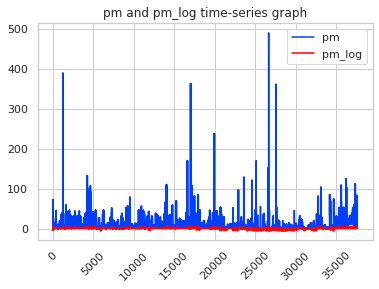

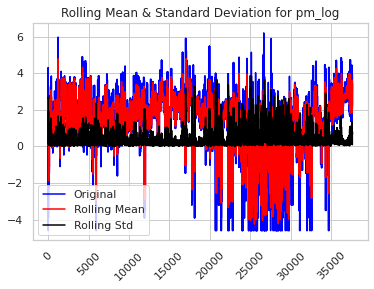

Results of Dickey-Fuller Test:
Test Statistic                -1.045326e+01
p-value                        1.420011e-18
# Lags Used                    5.300000e+01
Number of Observations Used    3.678700e+04
Critical Value (1%)           -3.430528e+00
Critical Value (5%)           -2.861619e+00
Critical Value (10%)          -2.566812e+00
dtype: float64


In [336]:
# Transformation - log ts
df['pm_log'] = df['pm'].apply(lambda x: np.log(x))


# Display data
display(df.head(10))


#df = df['pm_log'].dropna()


# Plot data
plot_transformed_data(df = df, 
                      pm = 'pm', 
                      pm_transform = 'pm_log') 
  
df = df[ ~( df.isin( [np.inf, -np.inf]).any(axis =1) )]

# Perform stationarity test
test_stationarity(df = df, 
                  pm = 'pm_log')

